In [18]:
# Importing necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
%matplotlib inline

# Dataset details
* COVID-19 cases at daily level is present in covid_19_india.csv file

* Individual level details are present in IndividualDetails.csv file and is obtained from this link

* Population at state level is present in population_india_census2011.csv file

* Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file

* Number of hospital beds in each state in present in HospitalBedsIndia.csv file and is extracted from this link

* Travel history dataset by @dheerajmpai - https://www.kaggle.com/dheerajmpai/covidindiatravelhistory

In [2]:
tests = pd.read_csv("data/ICMRTestingLabs.csv")
tests.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [6]:
tests.dtypes

lab        object
address    object
pincode     int64
city       object
state      object
type       object
dtype: object

In [7]:
len(tests)

267

In [9]:
cases = pd.read_csv("data/covid_19_india.csv")
cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [10]:
len(cases)

2774

In [15]:
cases.tail(20)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2754,2755,07/06/20,8:00 AM,Kerala,-,-,762,15,1807
2755,2756,07/06/20,8:00 AM,Ladakh,-,-,48,1,99
2756,2757,07/06/20,8:00 AM,Madhya Pradesh,-,-,6108,399,9228
2757,2758,07/06/20,8:00 AM,Maharashtra,-,-,37390,2969,82968
2758,2759,07/06/20,8:00 AM,Manipur,-,-,52,0,157
2759,2760,07/06/20,8:00 AM,Meghalaya,-,-,13,1,33
2760,2761,07/06/20,8:00 AM,Mizoram,-,-,1,0,24
2761,2762,07/06/20,8:00 AM,Nagaland,-,-,0,0,107
2762,2763,07/06/20,8:00 AM,Odisha,-,-,1716,8,2781
2763,2764,07/06/20,8:00 AM,Puducherry,-,-,36,0,99


In [23]:
cases.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Try to Plot the curve of daily cases in Maharastra w.r.t Date

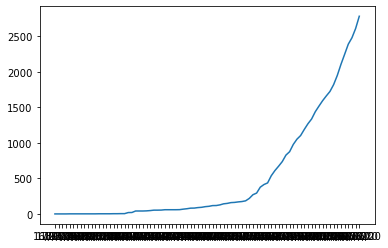

In [37]:
plt.plot(cases[cases["State/UnionTerritory"] == "Odisha"].Date,cases[cases["State/UnionTerritory"] == "Odisha"].Confirmed );

# Graph to see total cases statewise

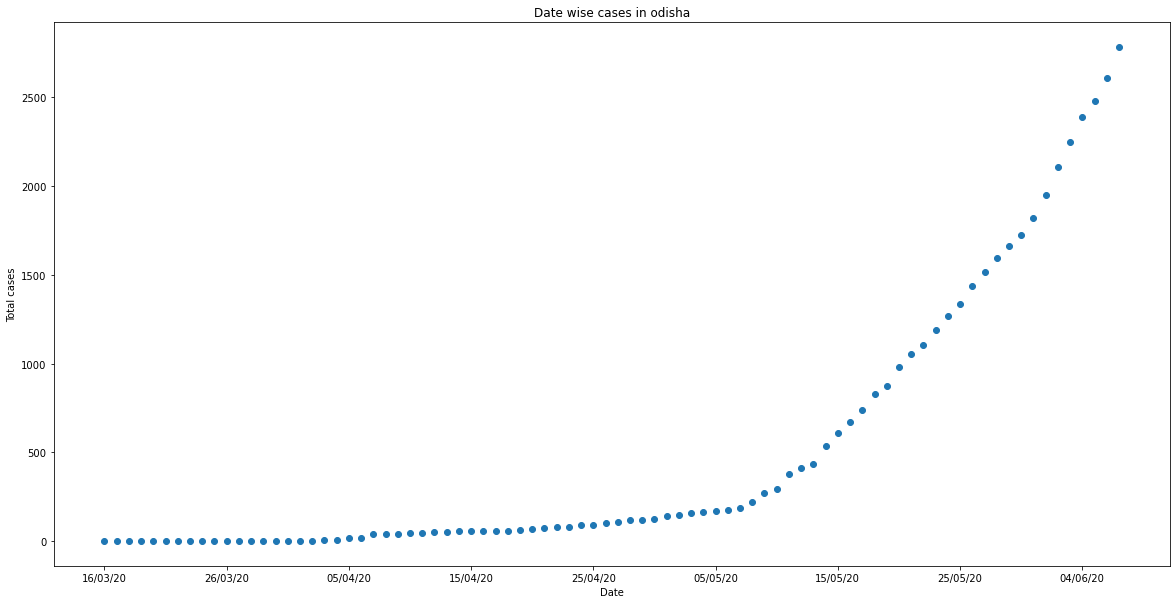

In [72]:
# Create Figure
fig, ax = plt.subplots(figsize=(20,10))

#add data
ax0 = ax.plot_date(cases[cases["State/UnionTerritory"] == "Odisha"].Date,cases[cases["State/UnionTerritory"] == "Odisha"].Confirmed)

#Reducing number of x ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

# Customize
ax.set(title = "Date wise cases in odisha",
       xlabel = "Date",
       ylabel = "Total cases");



# Graph to see total cases total

In [ ]:
# Create Figure
fig, ax = plt.subplots(figsize=(20,10))

#add data
ax0 = ax.plot_date(cases[,cases[cases["State/UnionTerritory"] == "Odisha"].Confirmed)

#Reducing number of x ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

# Customize
ax.set(title = "Date wise cases in odisha",
       xlabel = "Date",
       ylabel = "Total cases");

